## EDA (Exploratory Data Analysis)
- Load Dataset
- Data Summary (Quick Look)
- Data Cleaning (Handling Missing Values)
- Univariate Analysis
- Bivariate Analysis
- Correlations
- Outliers
- Feature Engineering

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inside-teen-minds-global-mental-health-and-habits/modern_teen_mental_health_main.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/wellness_habits_distribution.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/ai_tool_popularity.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/ai_usage_by_country.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/average_support_feeling_by_country.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/average_mood_stress_by_gender.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/daily_mood_stress_trends.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/screen_vs_sleep_by_age.csv


## Load Dataset

In [2]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Replace the filename below with the exact file name you saw printed
file_path = "/kaggle/input/inside-teen-minds-global-mental-health-and-habits/modern_teen_mental_health_main.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first 5 records
print(df.head())

  student_id        date  age  gender country grade  mood  stress_level  \
0      S0001  2025-01-01   15  Female     USA  11th     5             5   
1      S0001  2025-01-02   15  Female     USA  11th     6             4   
2      S0001  2025-01-03   15  Female     USA  11th     8             2   
3      S0001  2025-01-04   15  Female     USA  11th     5             6   
4      S0001  2025-01-05   15  Female     USA  11th     9             1   

   sleep_hours  screen_time_hours  used_ai_today    ai_tool  journaled_today  \
0          3.6                2.1          False        NaN            False   
1          9.1                8.8           True      Phind             True   
2          8.5                7.8           True  Notion AI            False   
3          4.9                6.1          False        NaN             True   
4          7.7                7.5          False        NaN             True   

   meditated_today  exercised_today  social_interaction_rating  \
0 

## Quick Look

In [3]:
df.shape
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 30000 non-null  object 
 1   date                       30000 non-null  object 
 2   age                        30000 non-null  int64  
 3   gender                     30000 non-null  object 
 4   country                    30000 non-null  object 
 5   grade                      30000 non-null  object 
 6   mood                       30000 non-null  int64  
 7   stress_level               30000 non-null  int64  
 8   sleep_hours                30000 non-null  float64
 9   screen_time_hours          30000 non-null  float64
 10  used_ai_today              30000 non-null  bool   
 11  ai_tool                    17991 non-null  object 
 12  journaled_today            30000 non-null  bool   
 13  meditated_today            30000 non-null  boo

,student_id,date,age,gender,country,grade,mood,stress_level,sleep_hours,screen_time_hours,used_ai_today,ai_tool,journaled_today,meditated_today,exercised_today,social_interaction_rating,support_feeling
count,30000,30000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000,17991,30000,30000,30000,30000.00000,30000.000000
unique,1000,30,NaN,3,8,4,NaN,NaN,NaN,NaN,2,6,2,2,2,NaN,NaN
top,S0001,2025-01-01,NaN,Male,USA,9th,NaN,NaN,NaN,NaN,True,Gemini,False,False,False,NaN,NaN
freq,30,1000,NaN,10560,4530,8250,NaN,NaN,NaN,NaN,17991,3075,15028,21096,18004,NaN,NaN
mean,NaN,NaN,15.557000,NaN,NaN,NaN,6.000733,4.043867,6.487783,6.980977,NaN,NaN,NaN,NaN,NaN,6.01370,6.500267
std,NaN,NaN,1.123741,NaN,NaN,NaN,1.991866,2.069449,1.493795,1.993324,NaN,NaN,NaN,NaN,NaN,1.99786,1.713271
min,NaN,NaN,14.000000,NaN,NaN,NaN,3.000000,1.000000,0.200000,-0.800000,NaN,NaN,NaN,NaN,NaN,3.00000,4.000000
25%,NaN,NaN,15.000000,NaN,NaN,NaN,4.000000,2.000000,5.500000,5.600000,NaN,NaN,NaN,NaN,NaN,4.00000,5.000000
50%,NaN,NaN,16.000000,NaN,NaN,NaN,6.000000,4.000000,6.500000,7.000000,NaN,NaN,NaN,NaN,NaN,6.00000,6.000000
75%,NaN,NaN,17.000000,NaN,NaN,NaN,8.000000,6.000000,7.500000,8.300000,NaN,NaN,NaN,NaN,NaN,8.00000,8.000000


## Handling missing values
- Checking for NULL values
- Visualising NULL values

student_id                       0
date                             0
age                              0
gender                           0
country                          0
grade                            0
mood                             0
stress_level                     0
sleep_hours                      0
screen_time_hours                0
used_ai_today                    0
ai_tool                      12009
journaled_today                  0
meditated_today                  0
exercised_today                  0
social_interaction_rating        0
support_feeling                  0
dtype: int64


<Axes: >

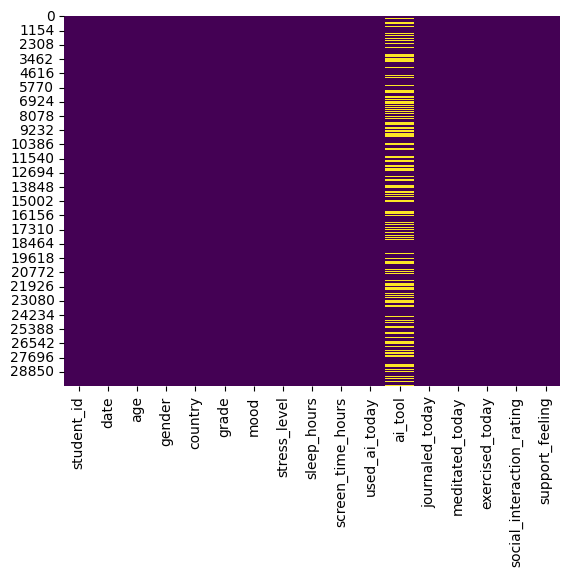

In [4]:
# Check missing values
print(df.isnull().sum())

# Visualize missing values
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

## Fixing Missing Values
- Drop rows if very few missing
- Else fill with mean/median/mode

In [5]:
#Here only ai_tool has a large number of null values

# df.dropna(inplace=True)

# df['Age'].fillna(df['Age'].mean(), inplace=True)  # for numeric
df['ai_tool'].fillna(df['ai_tool'].mode()[0], inplace=True)  # for categorical

In [6]:
df['ai_tool'].mode()[0]

'Gemini'

In [7]:
# Check missing values
print(df.isnull().sum())

student_id                   0
date                         0
age                          0
gender                       0
country                      0
grade                        0
mood                         0
stress_level                 0
sleep_hours                  0
screen_time_hours            0
used_ai_today                0
ai_tool                      0
journaled_today              0
meditated_today              0
exercised_today              0
social_interaction_rating    0
support_feeling              0
dtype: int64


## Univarate Analysis
Univariate = studying one column at a time.
- For categorical: value counts, bar plots
- For numerical: histograms, descriptive stats

It is important to help understand the distribution of each column and know what the data “looks like.”

## Categorical Data
- Turns out most teens in the survey were male followed by other gender and females

gender
Male      10560
Other     10140
Female     9300
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

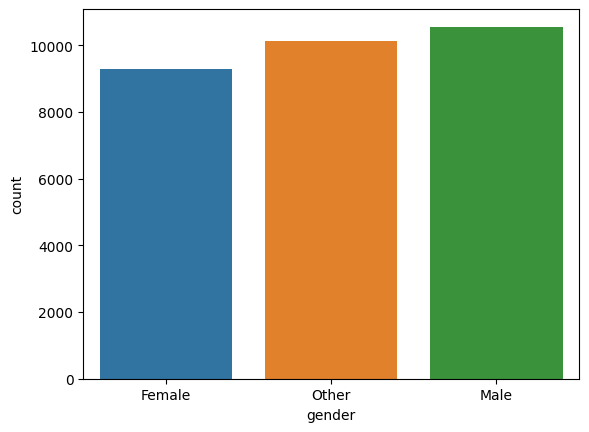

In [8]:
print(df['gender'].value_counts())
sns.countplot(x='gender', data=df)

#Turns out most teens in the survey were male followed by other gender and females

## Numerical Data
- Turns out screen time peaks hours peaks at around 7

count    30000.000000
mean         6.980977
std          1.993324
min         -0.800000
25%          5.600000
50%          7.000000
75%          8.300000
max         15.600000
Name: screen_time_hours, dtype: float64


<Axes: xlabel='screen_time_hours', ylabel='Count'>

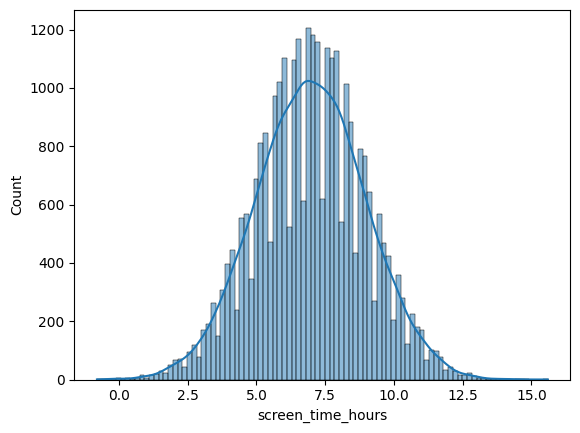

In [9]:
print(df['screen_time_hours'].describe())
sns.histplot(df['screen_time_hours'], kde=True)

#Turns out screen time peaks hours peaks at around 7

count    30000.000000
mean        15.557000
std          1.123741
min         14.000000
25%         15.000000
50%         16.000000
75%         17.000000
max         17.000000
Name: age, dtype: float64


<Axes: xlabel='age', ylabel='Count'>

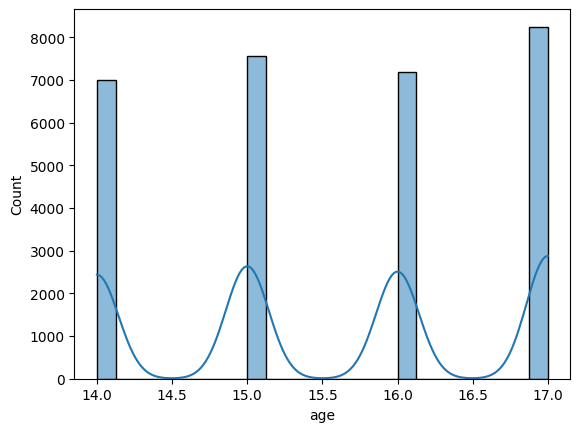

In [10]:
print(df['age'].describe())
sns.histplot(df['age'], kde=True)

## Categorical Summary

In [11]:
df.describe(include='object')

,student_id,date,gender,country,grade,ai_tool
count,30000,30000,30000,30000,30000,30000
unique,1000,30,3,8,4,6
top,S0001,2025-01-01,Male,USA,9th,Gemini
freq,30,1000,10560,4530,8250,15084


## Bivariate Analysis
Bivariate = analyzing two variables together.
- Categorical + Categorical → countplot(hue=...)
- Categorical + Numeric → boxplot()
- Numeric + Numeric → scatterplot()

It is helpful in finding relationships between variables.
E.g., Does gender affect depression?

## Box Plot
Numerical vs Categorical

- Turns out gender does not significantly affect social interaction rating
- Turns out used_ai_today does not significantly affect social interaction rating
- Turns out used_ai_today does not significantly affect stress levels
- Turns out used_ai_today does not significantly affect sleep hours
- Turns out country does not significantly affect social interaction rating
- Turns out country does not significantly affect stress levels

<Axes: xlabel='social_interaction_rating', ylabel='gender'>

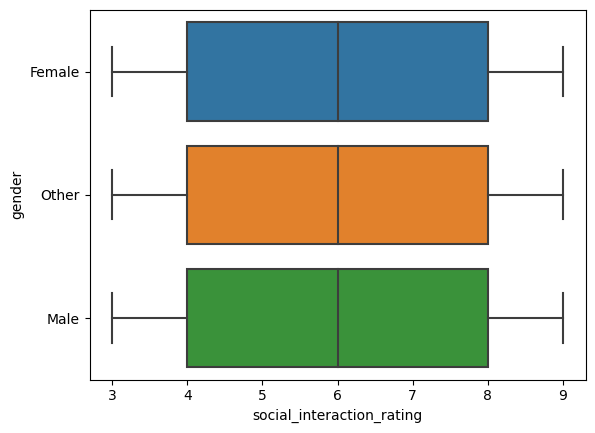

In [12]:
sns.boxplot(x='social_interaction_rating', y='gender', data=df)

In [13]:
df['social_interaction_rating'].unique()
print(df['social_interaction_rating'].dtype)

int64


In [14]:
df['used_ai_today'].unique()
print(df['used_ai_today'].dtype)

bool


In [15]:
# Reload the data cleanly (optional but recommended if you're unsure of previous steps)
df = pd.read_csv(file_path)  # ← Replace with your actual filename if needed

# STEP 1: Check raw unique values
print(df['used_ai_today'].unique())

[False  True]


In [16]:
# STEP 2: Safe mapping from strings/numbers to booleans
df['used_ai_today'] = df['used_ai_today'].astype(str).str.strip().str.lower()
df['used_ai_today'] = df['used_ai_today'].map({'true': True, 'false': False, '1': True, '0': False})

In [17]:
print(df['used_ai_today'].value_counts(dropna=False))

used_ai_today
True     17991
False    12009
Name: count, dtype: int64


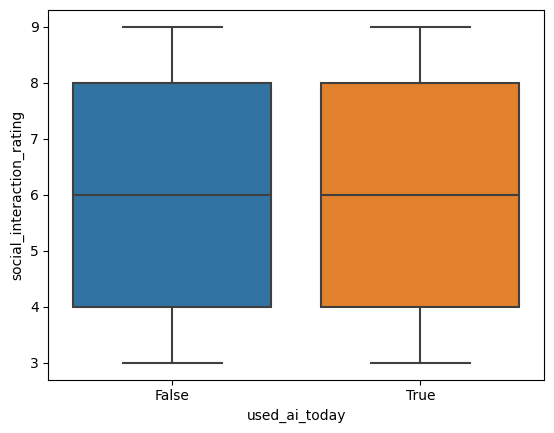

In [18]:
sns.boxplot(x='used_ai_today', y='social_interaction_rating', data=df)
plt.show()

<Axes: xlabel='social_interaction_rating', ylabel='country'>

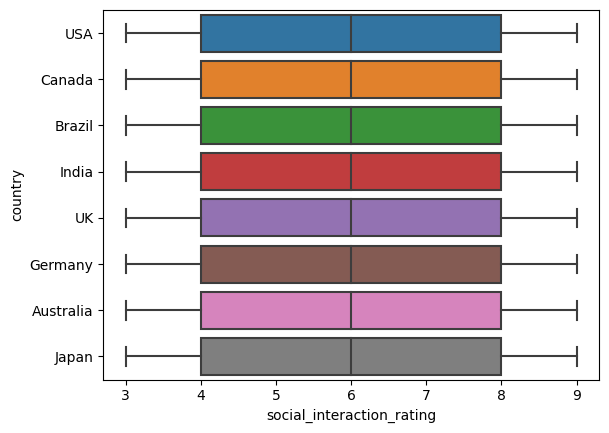

In [19]:
sns.boxplot(x='social_interaction_rating', y='country', data=df)

<Axes: xlabel='stress_level', ylabel='country'>

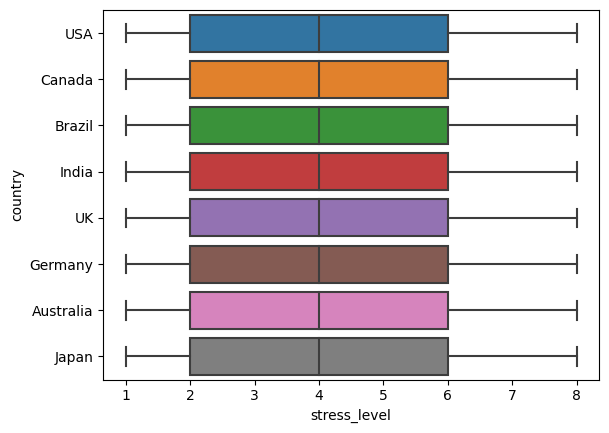

In [20]:
sns.boxplot(x='stress_level', y='country', data=df)

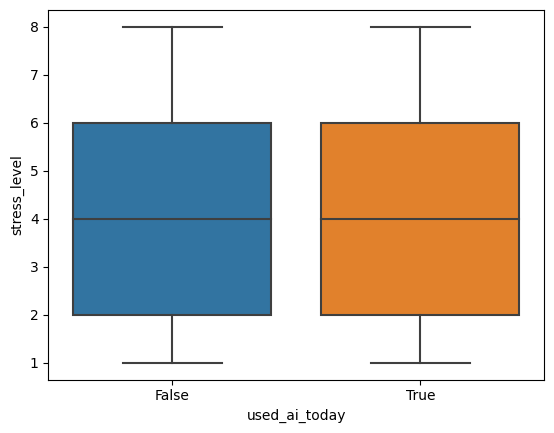

In [21]:
sns.boxplot(x='used_ai_today', y='stress_level', data=df)
plt.show()

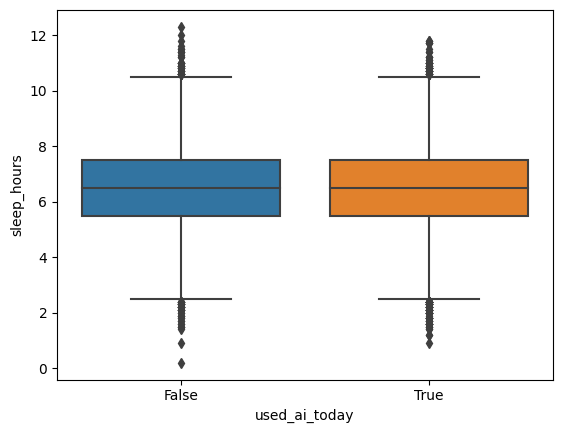

In [22]:
sns.boxplot(x='used_ai_today', y='sleep_hours', data=df)
plt.show()

## Countplot
Categorical vs Categorical

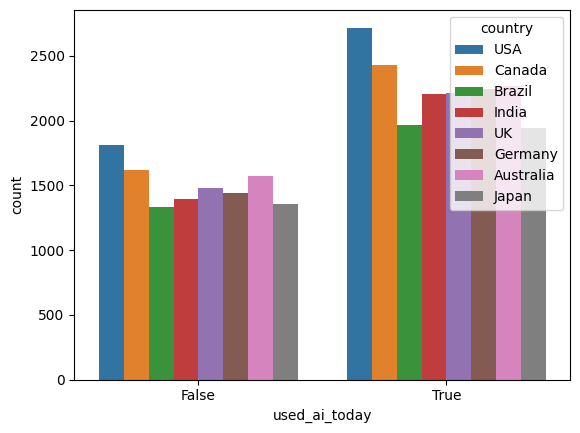

In [23]:
sns.countplot(x='used_ai_today', hue='country', data=df)
plt.show()

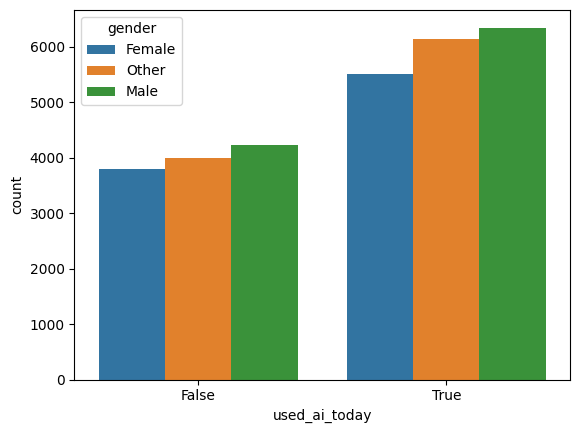

In [24]:
sns.countplot(x='used_ai_today', hue='gender', data=df)
plt.show()

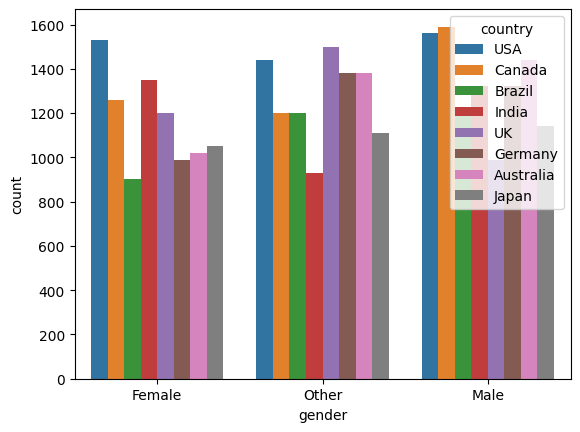

In [25]:
sns.countplot(x='gender', hue='country', data=df)
plt.show()

## Scatterplot
Numerical vs Numerical

<Axes: xlabel='age', ylabel='social_interaction_rating'>

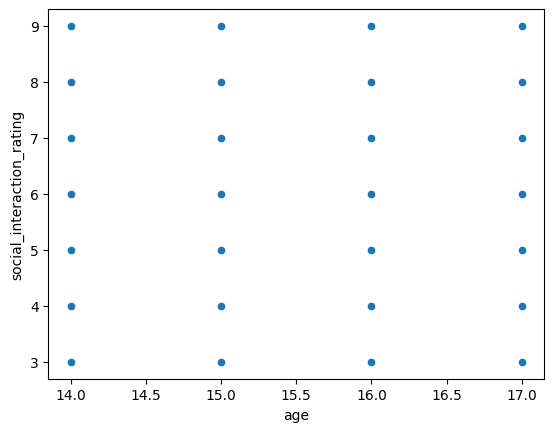

In [26]:
sns.scatterplot(x='age', y='social_interaction_rating', data=df)

<Axes: xlabel='age', ylabel='screen_time_hours'>

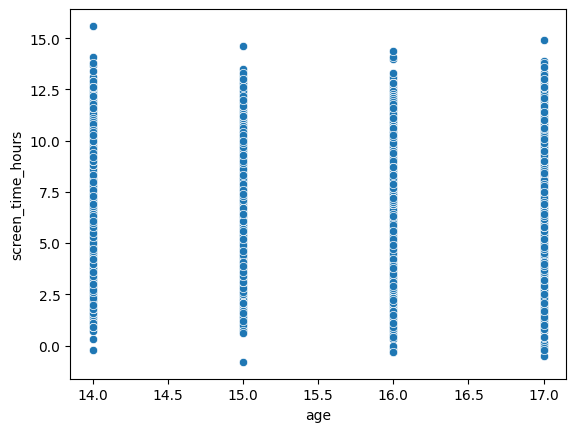

In [27]:
sns.scatterplot(x='age', y='screen_time_hours', data=df)

<Axes: xlabel='stress_level', ylabel='screen_time_hours'>

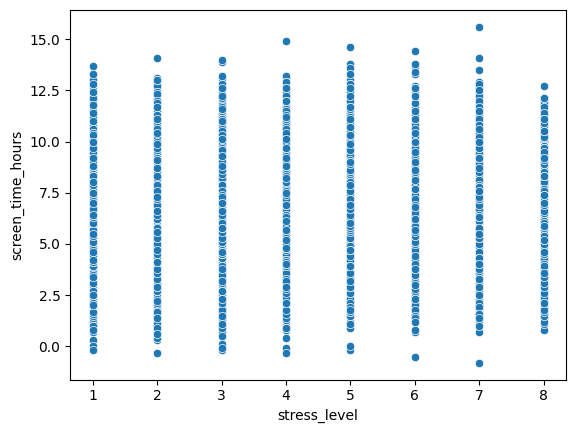

In [28]:
sns.scatterplot(x='stress_level', y='screen_time_hours', data=df)

## Correlation
Numeric Only

Correlation measures the linear relationship between numeric variables.
Range: -1 to +1
- +1 → strong positive (both go up)
- -1 → strong negative (one goes up, other down)
- 0 → no linear relationship

It helps identify important features for ML. Also helps detect multicollinearity.

<Axes: >

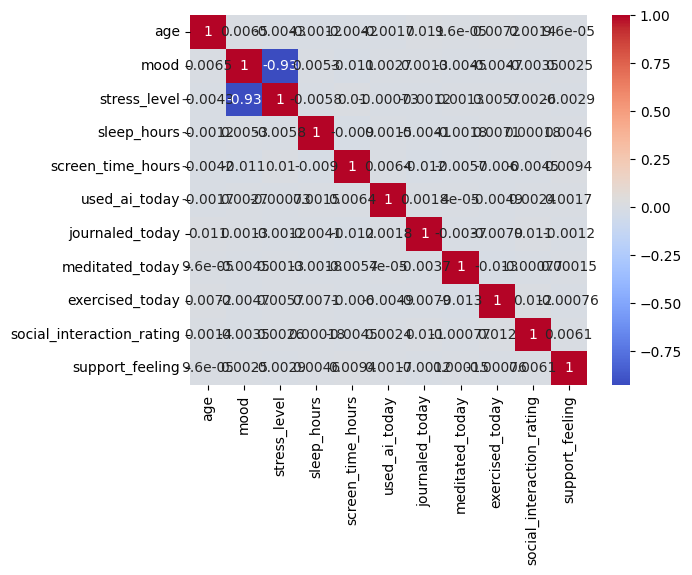

In [29]:
corr = df.corr(numeric_only=True)  # only numeric
sns.heatmap(corr, annot=True, cmap='coolwarm')

                           social_interaction_rating  sleep_hours  \
social_interaction_rating                   1.000000     0.000180   
sleep_hours                                 0.000180     1.000000   
stress_level                                0.002644    -0.005762   

                           stress_level  
social_interaction_rating      0.002644  
sleep_hours                   -0.005762  
stress_level                   1.000000  


<Axes: >

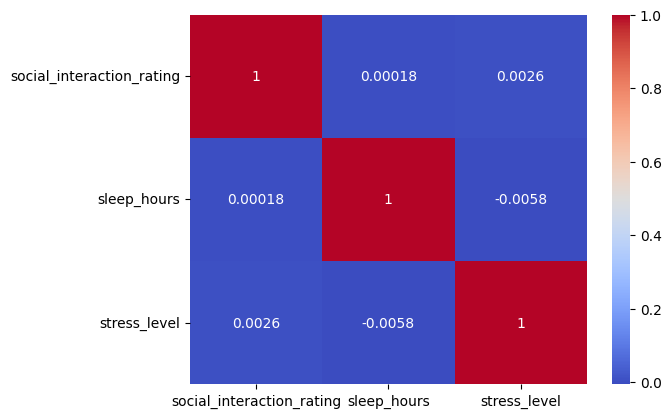

In [30]:
corr2 = df[['social_interaction_rating', 'sleep_hours', 'stress_level']].corr()
print(corr2)
sns.heatmap(corr2, annot=True, cmap='coolwarm')

# Outliers
Outliers are values that are far from normal range (very high/low).
They can distort the mean, affect model performance, and inflate error.

Why Important:
- Good models require clean, normalized data.
- Outliers may be errors or rare events — either fix or handle.

## 1. Boxplot to spot outliers:

<Axes: xlabel='age'>

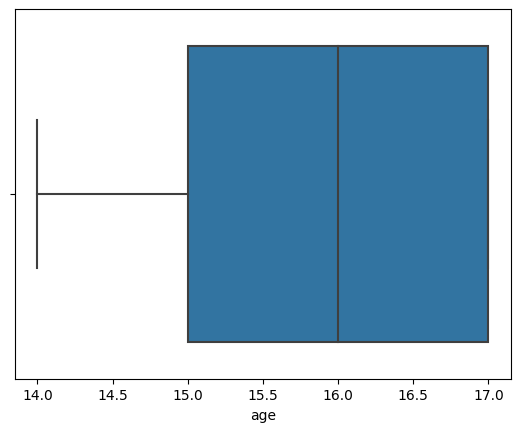

In [31]:
sns.boxplot(x=df['age'])

## 2. IQR Method to remove outliers:
## OR 
## 3. Z-score method:

In [32]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Keep only within 1.5*IQR
df = df[(df['age'] >= Q1 - 1.5 * IQR) & (df['age'] <= Q3 + 1.5 * IQR)]

In [33]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['age'])) < 3)]

<Axes: xlabel='age'>

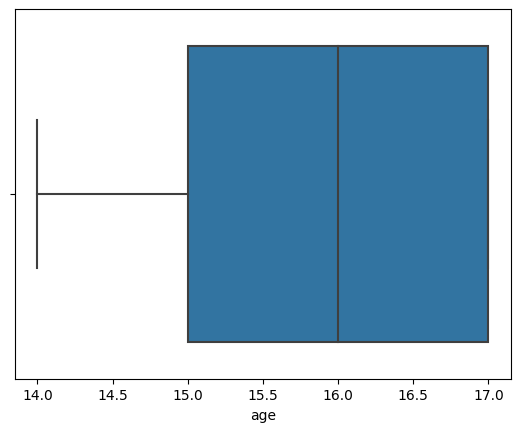

In [34]:
sns.boxplot(x=df['age'])

# Feature Engineering
Feature engineering means creating new columns (features) from existing data.

Examples:
- Combine columns
- Extract from text/date
- Group, bin, flag based on logic

Why Important:
- Strong features = strong model.
- The better your features, the more your model learns.

## 1. Binary Flag
Adding a column high risk for teens with sleep hours less than 4 and stress levels greater than 5, having values : 
- 0 : Not high risk
- 1 : High risk

In [35]:
df['HighRisk'] = ((df['sleep_hours']<4) & (df['stress_level']>5)).astype(int)

In [36]:
df.head()

,student_id,date,age,gender,country,grade,mood,stress_level,sleep_hours,screen_time_hours,used_ai_today,ai_tool,journaled_today,meditated_today,exercised_today,social_interaction_rating,support_feeling,HighRisk
0,S0001,2025-01-01,15,Female,USA,11th,5,5,3.6,2.1,False,NaN,False,False,True,6,7,0
1,S0001,2025-01-02,15,Female,USA,11th,6,4,9.1,8.8,True,Phind,True,False,True,4,7,0
2,S0001,2025-01-03,15,Female,USA,11th,8,2,8.5,7.8,True,Notion AI,False,True,False,6,5,0
3,S0001,2025-01-04,15,Female,USA,11th,5,6,4.9,6.1,False,NaN,True,True,False,5,9,0
4,S0001,2025-01-05,15,Female,USA,11th,9,1,7.7,7.5,False,NaN,True,True,False,5,9,0


## 2. Age Group:
Adding a separate column called age group having values :
- YoungTeen : for ages 13 to 15
- Older Teens : for ages 16 to 19

In [37]:
df['age_group'] = pd.cut(df['age'], bins=[13,16,19], labels=['YoungTeen', 'OlderTeen'])

In [38]:
df.head()

,student_id,date,age,gender,country,grade,mood,stress_level,sleep_hours,screen_time_hours,used_ai_today,ai_tool,journaled_today,meditated_today,exercised_today,social_interaction_rating,support_feeling,HighRisk,age_group
0,S0001,2025-01-01,15,Female,USA,11th,5,5,3.6,2.1,False,NaN,False,False,True,6,7,0,YoungTeen
1,S0001,2025-01-02,15,Female,USA,11th,6,4,9.1,8.8,True,Phind,True,False,True,4,7,0,YoungTeen
2,S0001,2025-01-03,15,Female,USA,11th,8,2,8.5,7.8,True,Notion AI,False,True,False,6,5,0,YoungTeen
3,S0001,2025-01-04,15,Female,USA,11th,5,6,4.9,6.1,False,NaN,True,True,False,5,9,0,YoungTeen
4,S0001,2025-01-05,15,Female,USA,11th,9,1,7.7,7.5,False,NaN,True,True,False,5,9,0,YoungTeen


## 3. Days from a date column:
Adding a new column days since with count of days from survey to present

In [39]:
df['date'] = pd.to_datetime(df['date'])
df['DaysSince'] = (pd.Timestamp('now') - df['date']).dt.days

In [40]:
df.head()

,student_id,date,age,gender,country,grade,mood,stress_level,sleep_hours,screen_time_hours,used_ai_today,ai_tool,journaled_today,meditated_today,exercised_today,social_interaction_rating,support_feeling,HighRisk,age_group,DaysSince
0,S0001,2025-01-01,15,Female,USA,11th,5,5,3.6,2.1,False,NaN,False,False,True,6,7,0,YoungTeen,167
1,S0001,2025-01-02,15,Female,USA,11th,6,4,9.1,8.8,True,Phind,True,False,True,4,7,0,YoungTeen,166
2,S0001,2025-01-03,15,Female,USA,11th,8,2,8.5,7.8,True,Notion AI,False,True,False,6,5,0,YoungTeen,165
3,S0001,2025-01-04,15,Female,USA,11th,5,6,4.9,6.1,False,NaN,True,True,False,5,9,0,YoungTeen,164
4,S0001,2025-01-05,15,Female,USA,11th,9,1,7.7,7.5,False,NaN,True,True,False,5,9,0,YoungTeen,163


# EDA Conclusion 
#### The EDA reveals key insights into teen behavior and well-being. After handling 12,009 missing values in the ‘ai_tool’ column by imputing the mode (‘Gemini’), univariate analysis showed a gender skew toward males, with most participants aged 14–17 and a peak in screen time around 7 hours. Bivariate analysis highlighted widespread AI adoption—especially in the USA and Canada—with males using AI more than females. Age showed minimal influence on social interaction or screen time. A strong negative correlation (-0.93) between mood and stress levels was observed, while other features showed weak associations. No outliers were found in age, and the distribution was slightly right-skewed. Feature engineering introduced a ‘HighRisk’ flag (low sleep, high stress), ‘AgeGroup’, and ‘DateSince’ to enrich analysis.

# 1. Missing Values
- 12009 nulls in 'ai_tool' column
- Filled using most frequently occurring (mode) value in that column ('Gemini')

# 2. Univariate Analysis
- Gender skewed toward Male
- Age mostly 14–17
- Screen time hours peaked around 7

# 3. Bivariate Insights
- Suggests a global trend of high AI usage today across countries, especially in USA and Canada
- All gender groups show more AI usage than non-usage, indicating overall positive adoption across genders. However, there’s a gender gap, with females having the lowest AI usage among the three.
- Age in this narrow range doesn’t significantly influence social interaction ratings
- Teens across all age groups (14 to 17) show similar screen time patterns.
- No clear linear trend, but might indicate a positive association: teens with more screen time could be experiencing higher stress, but further statistical analysis is needed to confirm this.

# 5. Correlation
- mood and stress_level: high negative correlation (-0.93), meaning higher stress = worse mood
- used_ai_today, journaling, meditation, etc., show minimal correlation with screen time or social rating.
- Stress vs Screen Time : Slight clustering, meaning higher stress may associate with higher screen time, but not strongly
- sleep_hours and stress_level: weak negative correlation (-0.0058)
- social_interaction_rating and stress_level: very weak positive correlation (0.0026)

# 6. Outliers
- There are no points beyond the whiskers, therefore this dataset has no age outliers
- The data is slightly right-skewed, as the box is slightly longer on the right side of the median, indicating a few more older teens in the dataset.

# 7. Feature Engineering
- Added ‘HighRisk’ binary flag for teens having sleep hours less than 4 and stress levels higher than 5.
- Added 'AgeGroup' column for further classification into young teens and older teens
- Added 'DateSince' column for tracking days since survey